# Project 3: Modeling The Solar System
### Robert Sutherland Computational Physics (PHY480), Michigan State University

# Table of Contents

[0.0 Wisdom From the Past](#cell0.0)

[1.0 Construct the Solver: A Simple Example](#cell1.0)

[1.1 Setting up the algorithm (a) RUN THIS CODE BEFORE ANY LATER SECTIONS](#cell1.1)

[1.2 Theory Behind Runge-Kutta](#cell1.2)

[1.3 Define RK4 for Later Use](#cell1.3)

[2.0 Applying Runge Kutta: Earth-Sun System](#cell2.0)

[2.1 Applying Runge Kutta: My Code](#cell2.1)

<a id="cell0.0"></a>
### 0.0 Learning From Previous Projects

I noticed in project 1 and 2 that I ended up copying a lot of code only to make slight modifications.  That process is effective, but it's really sloppy and I think it makes my reports look a little less professional.  I would like to take advantage of the object-orientation in this project to create blocks of code which I can call when I need them.  This should reduce the length of my report and make it more readable.

I should put all of my imports in one header box of code so I don't have to use them over and over and I should encase my RK4 solver in it's own box as well and just call it when I need it.

I found this super cool matplotlib reference page:
http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

Lastly I am tring a different approach here inspired by a quote from Sanjoy Mahajan's $\textit{Street-Fighting Mathematics}$: 

$\textbf{"To much mathematical rigor leads to rigor-mortis, the fear to make an unjustified leap."}$  

I feel I spent too much time on preliminary theory and in the interest of finals-deadline-rush I will just dive straight into the code and worry about the theory later.

<a id="cell1.0"></a>
## 1.0 A Simple Example Using the Runge-Kutta 4 Solver

Here we will call upon the Runge-Kutta 4 solver to solve the equation for Hooke's law, which describes a mass on a spring.

$$m\frac{d^2x}{dt^2}=-kx(t)\hspace{1.5cm}(1)$$

We chose this equation because the analytical solution is know and can be arrived at fairly easily with some basic calculus.  In order to solve eq(1) we can rewrite it in a more suggestive form.

$$\frac{d^2x}{dt^2}=-\frac{k}{m}x(t)\hspace{1.5cm}(2)$$

Following tradition we define $\omega=\sqrt{k/m}$.  eq(2) then becomes

$$\frac{d^2x}{dt^2}=-\omega^2x(t)\hspace{1.5cm}(3)$$

which lends itself nicely to a solutions of the form $x=Asin(\omega t+\phi)$ or $Acos(\omega t+\phi)$.  For our particular case, let's set the phase constant $\phi=0$ and further impose the condition that x(0) = 0.  This fixes our solution to 

$$x(t)=Asin(\omega t)$$

The velocity is also fairly obvious...

$$v(t)=\omega Acos(\omega t)$$

Invoking a little bit of physical foresight I would like to write

$$v(t)=V_0cos(\omega t)$$

I will write eq(1) in terms of velocity so that the problem we attempt can be first order.  Just to be clear our initial goal will be to solve for the $\textit{velocity}$, then we can use the velocity and the time step to get our new value for x and iterate.

$$v'(t)=-\omega^2x(t)\hspace{1.5cm}(4)$$

In the following cell I will attempt now to arrive at the same solutions for the velocity and position using the Runge-Kutta 4 methods discussed in lecture and in section 8.4 of the lecture notes.  I define $A$ and $\omega$ so that the function has a period of $2\pi$.  So we have the parameters 

$$A=1 \hspace{1.5cm} \omega=1$$

I will also stick with the initial conditions discussed here in my code.

<a id="cell1.1"></a>
## Setting Up the Algorithm

In [ ]:
from array import *
import math 
import numpy as np

'''
Let n be the number of steps
t_0 and t_f represent initial and final times respectively
The step size h is then (t_f-t_0)/n

Also, I am going to try following Mathematica's Convention
of marking functions with capitals
'''
#Define time interval & step size
#Starting at t=0
t_0=0;t_f=10*math.pi
n=10000
h=(t_f-t_0)/n

#Vectorize time, position, and velocity
t_vec=np.zeros(n)
x_vec=np.zeros(n)
v_x_vec=np.zeros(n)
i=1
while i<=n:
    t_vec[i-1]=t_0+i*h
    i=i+1
#print(t_vec)


#Set the value of omega (w) and A, for convenience both are 1 by default
w=1;A=1
#Initialize eq(4)
def Vprime_x(x_in):
    return -w**2*A*x_in

#Specify our initial conditions v_0=A
x_0=0
v_x0=A
v_x_vec[0]=v_x0;x_vec[0]=0;t_0=0.0
'''
-------------------------------
Our Runge-Kutta Solver is here.
-------------------------------
'''
def RK4(f,x_rk,v_rk):
    global x,v_x
    #Solve for the velocity
    k1=h*f(x_rk)
    k2=h*f(x_rk+k1/2)
    k3=h*f(x_rk+k2/2)
    k4=h*f(x_rk+k3)
    v_x = v_rk+(k1+2*k2+2*k3+k4)/6
    #Use velocity to solve for x at t=t+1
    x=x_rk+h*v_x+(h**2/2)*f(x_rk)

#Step 1 goes outside of loop
RK4(Vprime_x,x_0,v_x0)
x_vec[1]=x
v_x_vec[1]=v_x

#Now just loop, storing variables in array
j=2
while j < n:
    RK4(Vprime_x,x_vec[j-1],v_x_vec[j-1])
    x_vec[j]=x
    v_x_vec[j]=v_x
    #print(x,v_x)
    j=j+1

#Plotting
from pylab import *
%matplotlib inline
xlabel("t")
ylabel("")
axes = plt.gca()
axes.set_xlim([0,10*math.pi])
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
axes.set_ylim([-A,A])
title(" ")
#You can add a plot legend instead of just hacking one into the title
plot(t_vec,v_x_vec,label="v(t)=$\omega$Asin($\omega t$)")
plot(t_vec,x_vec,label="x(t)=$A$sin($\omega t$)")
plt.legend(loc='upper left')
#Suppress output from plotting section
print("")

<a id="cell1.2"></a>
## Runge-Kutta 4 Function

Alright!  So we can see clearly from the plot above that the solver is working properly.  Even after 5 periods everyhing still looks good.  Now that we have the pragmatism out of the way, it's worth presenting a theoretical overview of how and why the above solver actually works.  This section follows the lecture notes closely so if you've already read them (or if you've written them) there's no need to read this.

### The Basic Idea 
Following the example in the lecture notes we consider a simple and general case of the form

$$\frac{dy}{dt}=f(y,t)$$

Being physicists, we fall back upon our favorite approximation tool, the taylor expansion, which for some arbitrary function f(y) looks like

$$f(y) = \sum_{n=0}^{\infty}\frac{f^{(n)}(y)}{n!}(y-a)^n$$

Using this idea we can express y' above as

$$y'_{i+1} \approx y'_i + hf(y_i,t_i)$$

Where y'_i, y_i, and t_i are all specified by initial conditions.  Now let c1 be $hf(y,t)$ at any step.  The equation above is now

$$y_{i+1} \approx y_i + (c1)_i$$

We can then use our c1 to correct our approximation by interpolating a point in between $y_i$ and $y_{i+1}$.  We thus define c2 

$$c2 = hf(y_{i+1/2},t_{i+1/2}) = hf(y_i + c1/2,t_{i+1/2})$$

Now we can say that 

$$y_{i+1} = y_i + c2$$

### The Fourth Order 
So far the method we have discussed represents a second order correction.  The Runge-Kutta4 method is so named because it's corrections are fourth order.  The algorithm is actually marvelously simple (even simpler I think than either of the previous projects, but maybe I'm just getting better at this stuff).

To take this approach out to forth order we need only apply Simpson's formula

$$\int_{t_i}^{t_{i+1}}f(y,t)dt \approx \frac{h}{6}[f(y_i,t_i)+4f(y_{i+1/2},t_{i+1/2})+f(y_{i+1},t_{i+1})]$$

We simply split the middle step evaluation into two pieces and get 

$$\int_{t_i}^{t_{i+1}}f(y,t)dt \approx \frac{h}{6} [f(y_i,t_i)+2f(y_{i+1/2},t_{i+1/2})+2f(y_{i+1/2},t_{i+1/2})+f(y_{i+1},t_{i+1})]$$

In therms of the variables in the code above we now have simpson's formula as

$$\int_{t_i}^{t_{i+1}}f(y,t)dt \approx\frac{h}{6}[k1+2k2+2k3+k4]$$

and that's really all there is to it, the rest can be seen clearly from the program.

<a id="cell1.3"></a>
## Define RK4 Function

Here I am defining everything that will be used repeatedly throughout this code, then we avoid having to copy-paste.  If you want to edit the time interval, you will either have to do it here or you will have to recreate the time vector in your code block.

In [1]:
#Let's put everything we'll need to import in one cell this time
from array import *
import math 
import numpy as np

#Define time interval & step size
#Starting at t=0
t_0=0;t_f=2*math.pi
n=1000
h=(t_f-t_0)/n

'''
-------------------------------
Our Runge-Kutta Solver is here.
-------------------------------
'''
def RK4(f,p_rk,v_rk):
    global p_out,v_out
    #Solve for the velocity
    k1=h*f(p_rk)
    k2=h*f(p_rk+k1/2)
    k3=h*f(p_rk+k2/2)
    k4=h*f(p_rk+k3)
    v_out = v_rk+(k1+2*k2+2*k3+k4)/6
    #Use velocity to solve for x at t=t+1
    p_out=p_rk+h*v_out+(h**2/2)*f(p_rk)
    
#Vectorize time, position, and velocity
t_vec=np.zeros(n)
x_vec=np.zeros(n)
y_vec=np.zeros(n)
v_x_vec=np.zeros(n)
v_y_vec=np.zeros(n)
i=1
while i<=n:
    t_vec[i-1]=t_0+i*h
    i=i+1

<a id="cell2.0"></a>

## Applying RK4: Earth-Sun System

### The Problem 

We begin our models of the solar system by considering simply the Earth-Sun system.  In this instance we assume circular orbit.  This makes the analytical solution easily attainable and allows us to check our code.  In fact, the analytical solution for this case is essentially identical to what we get for Hooke's Law above.

In our case we are asked to consider only 2 spacial dimensions and so have the following two equations describing our system

$$\frac{d^2y}{dt^2}=\frac{GM_{sun}}{r^2} sin(\omega t)\hspace{0.75cm}\&\hspace{0.75cm}\frac{d^2x}{dt^2}=\frac{GM_{sun}}{r^2}cos(\omega t)$$

Casting everything in cartesian terms gives
$$\frac{d^2y}{dt^2}=\frac{GM_{sun}}{r^3} y(t)\hspace{0.75cm}\&\hspace{0.75cm}\frac{d^2x}{dt^2}=\frac{GM_{sun}}{r^3}x(t)$$

In the instance of circular orbit the radius will be constant.

Now that if we were to simply define some constant $\omega ^2=GM_{sun}/r^3$ the equations above would perfectly mirror the simple example we worked earlier!  Solving this problem then becomes a simple matter of applying our RK4 solver twice.

### Initial Conditions

I will define my coordinates so that the planet at $t=0$ always begins at $x(0)=r$ and $y(0)=0$.  This also fixes the initial conditions for velocity to $v_x(0)=v_{max}$ and $v_y(0)=0$.  We can quickly carry out a bit of analysis to arrive at a reasonable estimate for $v_{max}$.

For circular motion we have

$$\frac{mv^2}{r}=F_{centripital}$$

For our particular system this becomes

$$\frac{M_{Earth}v^2}{r}=\frac{GM_{Earth}M_{Sun}}{r^2}$$

We can then solve this equation for velocity to obtain

$$v=\sqrt{\frac{GM}{r}}$$

Knowing that at t=0 all of our velocity is in the y direction we have obtained a suitable expression for estimating the initial velocity.

### Units

### Code vs. Theory: Orbital Period


<a id="cell2.1"></a>

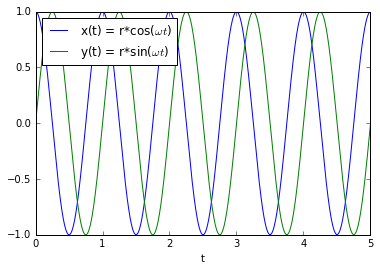

In [8]:
#Although these parameters are available in the function cell above I found it more convenient to have them here.
#THIS IS AN EXAMPLE WHERE HAVING A CLASS OR A FUNCTION JUST FOR THESE VECTORS WOULD BE HELPFUL
'''
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
CONSIDER THIS FOR LATER IN THE PROJECT
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
'''

#Define time interval & step size
#Starting at t=0
t_0=0;t_f=5
n=100000
h=(t_f-t_0)/n

#Vectorize time, position, and velocity
t_vec=np.zeros(n)
x_vec=np.zeros(n)
y_vec=np.zeros(n)
v_x_vec=np.zeros(n)
v_y_vec=np.zeros(n)
i=1
while i<=n:
    t_vec[i-1]=t_0+i*h
    i=i+1

#I am grouping the gravitational constant G in with the mass of the Sun to one constant GM
#Because of the way we defined out GM=4pi**2 and r=1
GM=4*math.pi**2;r=1

#Initialize the equations from above
def Vprime_x(x_in):
    return -(GM/(r**3))*x_in
def Vprime_y(y_in):
    return -(GM/(r**3))*y_in

#Specify our initial conditions for x, calculate y conditions
t_0=0.0
v_x0=v_x_vec[0]=0;x_0=x_vec[0]=r
v_y0=v_y_vec[0]=math.sqrt(GM/r);y_0=y_vec[0]=0

#Step 1 goes outside of loop
RK4(Vprime_x,x_0,v_x0)
x_vec[1]=p_out
v_x_vec[1]=v_out

RK4(Vprime_y,y_0,v_y0)
y_vec[1]=p_out
v_y_vec[1]=v_out

#Now just loop, storing variables in array
j=2
while j < n:
    RK4(Vprime_x,x_vec[j-1],v_x_vec[j-1])
    x_vec[j]=p_out
    v_x_vec[j]=v_out
    
    RK4(Vprime_y,y_vec[j-1],v_y_vec[j-1])
    y_vec[j]=p_out
    v_y_vec[j]=v_out
    j=j+1

#Plotting
from pylab import *
%matplotlib inline
xlabel("t")
ylabel("")
axes = plt.gca()
axes.set_xlim([0,5])
axes.set_ylim([-r,r])
title(" ")
#You can add a plot legend instead of just hacking one into the title
plot(t_vec,x_vec,label="x(t) = r*cos($\omega t$)")
plot(t_vec,y_vec,label="y(t) = r*sin($\omega t$)")
plt.legend(loc='upper left')
#Suppress output from plotting section
print("")